In [345]:
import json
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn import cross_validation # used to test classifier
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')


plt.rcParams['figure.figsize'] = (20, 10) #Defining size of plots
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve # ROC Curves
from sklearn.metrics import auc # Calculating AUC for ROC's!
import warnings

warnings.filterwarnings('ignore')

In [346]:
dj = pd.read_json('uber.json') # Reading the json file
df_main = pd.DataFrame(dj)

In [347]:
df_main.shape # Determining the size of the dataset

(51212, 15)

In [348]:
df_uber=df_main # Creating a copy of dataset

In [349]:
df_uber.head() # view dataset

,Date-time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [350]:
uber = df_uber[df_main.display_name != 'TAXI'] # Removing all records of Taxi because aim is to focus on trends on Uber

In [351]:
uber.head() # Loding dataset

,Date-time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [352]:
import datetime # import to use the date time functiuons

In [353]:
uber.dtypes # checking type of each column

Date-time                  object
currency_code              object
display_name               object
distance                  float64
duration                    int64
end_latitude              float64
end_longitude             float64
estimate                   object
high_estimate             float64
localized_display_name     object
low_estimate              float64
product_id                 object
start_latitude            float64
start_longitude           float64
time                       object
dtype: object

In [354]:
uber = uber.rename(columns = {'Date-time':'date_time'}) # Renaming Column

In [355]:
uber.head() # Viewing the table

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [356]:
df = pd.DataFrame(uber.date_time.str.split(' ',1).tolist(),
                                   columns = ['Date','Time'])
df.head() #to check the range of date in the file

,Date,Time
0,2017-12-05,22:47:56
1,2017-12-05,22:47:56
2,2017-12-05,22:47:56
3,2017-12-05,22:47:56
4,2017-12-05,22:47:56


In [357]:
print(min(df.Date)) # Display of date range
print(max(df.Date))

2017-12-05
2017-12-13


In [358]:
df.head() # Display of dataframe

,Date,Time
0,2017-12-05,22:47:56
1,2017-12-05,22:47:56
2,2017-12-05,22:47:56
3,2017-12-05,22:47:56
4,2017-12-05,22:47:56


In [359]:
uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [360]:
uber['date_time'] = pd.to_datetime(uber['date_time']) #Converting to date time format

In [361]:
uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56


In [362]:
def weather(x):
    x = x.strftime('%Y-%m-%d')
    if x in ['2017-12-05', '2017-12-06']:
        return 'Rainy'
    elif x in ['2017-12-09']:
        return 'Snowy'
    elif x in ['2017-12-07', '2017-12-10', '2017-12-13']:
        return 'Sunny'
    else:
        return 'Cloudy'
    
# Function to define weather on the day of ride

In [363]:
 # Inserting new columns for date and Week day
uber['date'] = uber['date_time'].dt.date
uber['day_of_week'] = uber['date_time'].dt.weekday_name

In [364]:
uber['Weather'] = uber['date'].apply(weather) # inserting new column to predict the weather

In [365]:

uber.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
1,2017-12-05 22:47:56,USD,uberX,8.24,1080,42.314857,-71.056782,$18-23,23.0,uberX,18.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
2,2017-12-05 22:47:56,USD,uberSUV,8.24,1080,42.314857,-71.056782,$50-63,63.0,uberSUV,50.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
3,2017-12-05 22:47:56,USD,uberXL,8.24,1080,42.314857,-71.056782,$28-35,35.0,uberXL,28.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
4,2017-12-05 22:47:56,USD,UberBLACK,8.24,1080,42.314857,-71.056782,$41-51,51.0,UberBLACK,41.0,6c84fd89-3f11-4782-9b50-97c468b19529,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy


In [366]:
uber.dtypes # to determin type of column in table

date_time                 datetime64[ns]
currency_code                     object
display_name                      object
distance                         float64
duration                           int64
end_latitude                     float64
end_longitude                    float64
estimate                          object
high_estimate                    float64
localized_display_name            object
low_estimate                     float64
product_id                        object
start_latitude                   float64
start_longitude                  float64
time                              object
date                              object
day_of_week                       object
Weather                           object
dtype: object

In [367]:
#here we will separate the 6 different types of uber services into their own dataframes
uberPOOL = uber[uber.display_name == 'uberPOOL'] # Filtering by uber ride type
uberPOOL.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
7,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
14,2017-12-05 22:48:51,USD,uberPOOL,6.18,1140,42.272678,-71.093765,$6-9,10.0,uberPOOL,6.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
21,2017-12-05 22:48:51,USD,uberPOOL,6.18,1140,42.272678,-71.093765,$6-9,10.0,uberPOOL,6.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
28,2017-12-05 22:51:50,USD,uberPOOL,8.53,1320,42.247948,-71.173050,$10-14,15.0,uberPOOL,10.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:51:50,2017-12-05,Tuesday,Rainy


In [368]:
#remove duplicated datetimeindex
uberPOOL = uberPOOL[~uberPOOL.date_time.duplicated(keep = 'first')] 
uberPOOL.head()

,date_time,currency_code,display_name,distance,duration,end_latitude,end_longitude,estimate,high_estimate,localized_display_name,low_estimate,product_id,start_latitude,start_longitude,time,date,day_of_week,Weather
0,2017-12-05 22:47:56,USD,uberPOOL,8.24,1080,42.314857,-71.056782,$8-11,12.0,uberPOOL,8.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:47:56,2017-12-05,Tuesday,Rainy
14,2017-12-05 22:48:51,USD,uberPOOL,6.18,1140,42.272678,-71.093765,$6-9,10.0,uberPOOL,6.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:48:51,2017-12-05,Tuesday,Rainy
28,2017-12-05 22:51:50,USD,uberPOOL,8.53,1320,42.247948,-71.173050,$10-14,15.0,uberPOOL,10.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:51:50,2017-12-05,Tuesday,Rainy
42,2017-12-05 22:54:57,USD,uberPOOL,3.24,840,42.338443,-71.074548,$5-7,8.0,uberPOOL,5.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:54:57,2017-12-05,Tuesday,Rainy
56,2017-12-05 22:57:49,USD,uberPOOL,4.14,720,42.360958,-71.065895,$7-10,11.0,uberPOOL,7.0,997acbb5-e102-41e1-b155-9df7de0a73f2,42.342588,-71.122463,22:57:49,2017-12-05,Tuesday,Rainy


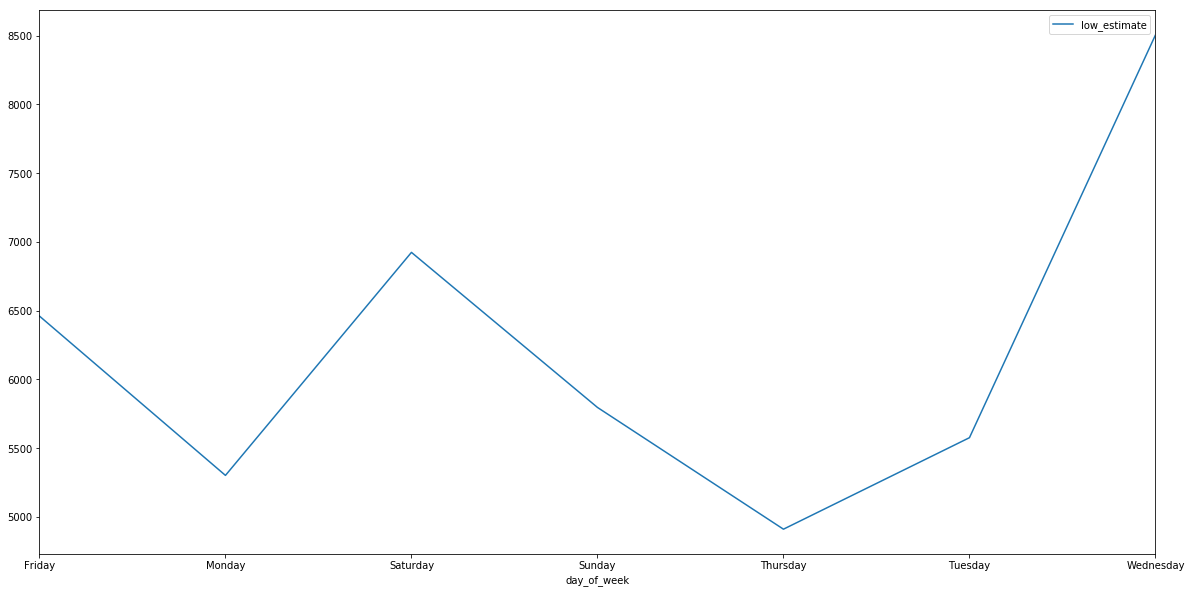

In [369]:
import numpy as np # low estimate trend based on week day
uber_by_day = uberPOOL[["day_of_week","low_estimate"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

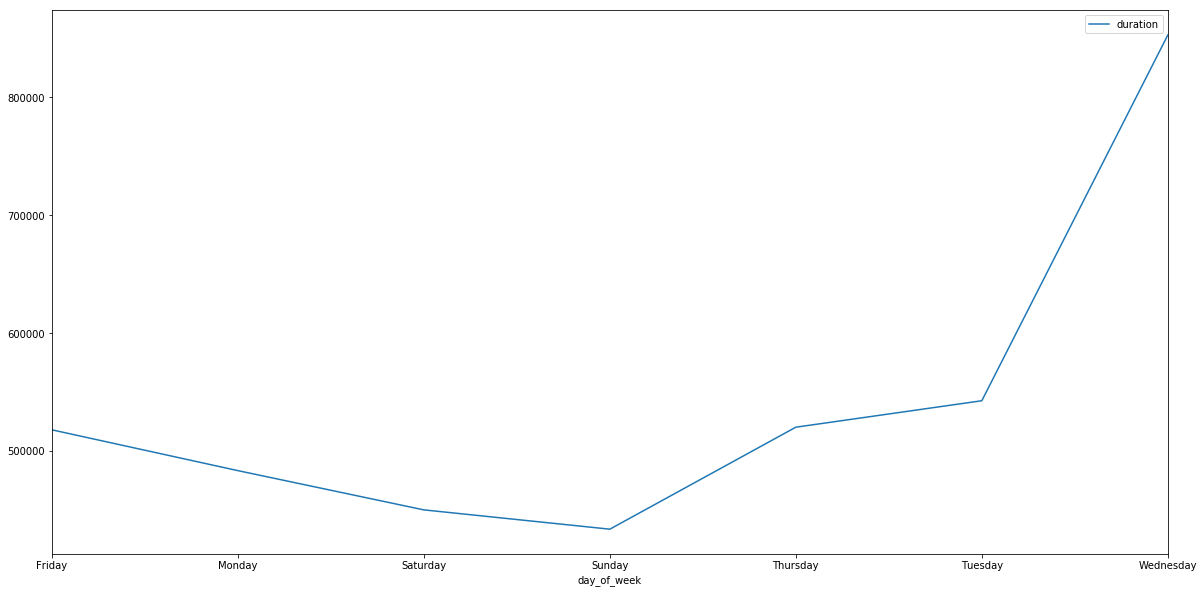

In [370]:
import numpy as np #Duration trend based on weekday
uber_by_day = uberPOOL[["day_of_week","duration"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

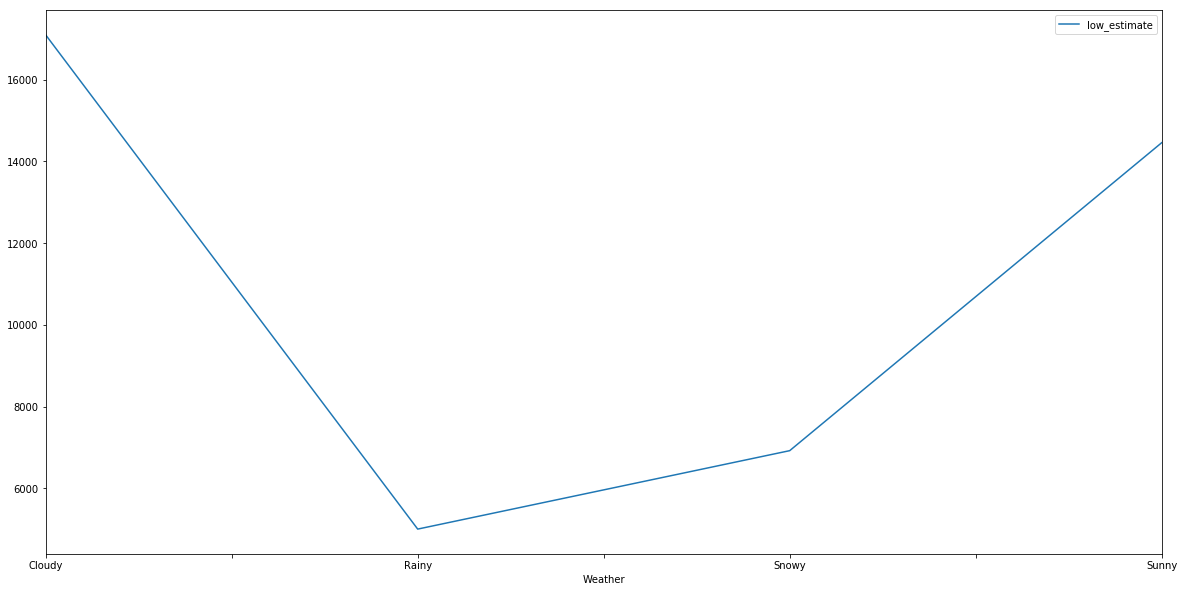

In [371]:
import numpy as np #low estimate trend based on weather
uber_by_weather = uberPOOL[["Weather","low_estimate"]].groupby("Weather").aggregate(np.sum)
uber_by_weather.plot();

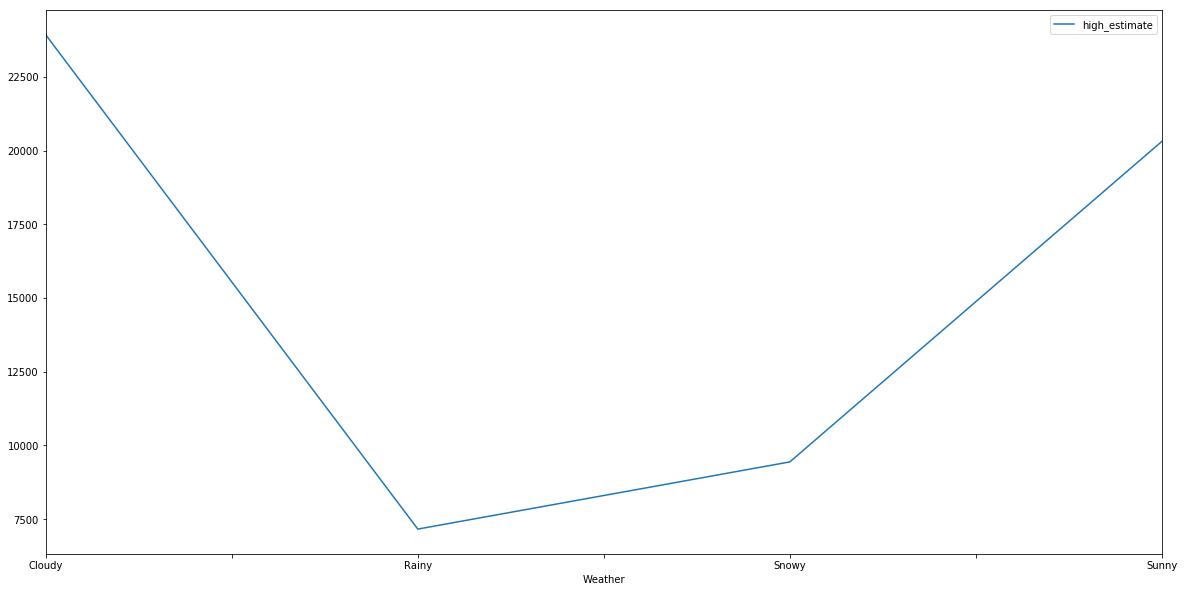

In [372]:
import numpy as np #High estimate trend based on weather
uber_by_weather = uberPOOL[["Weather","high_estimate"]].groupby("Weather").aggregate(np.sum)
uber_by_weather.plot();

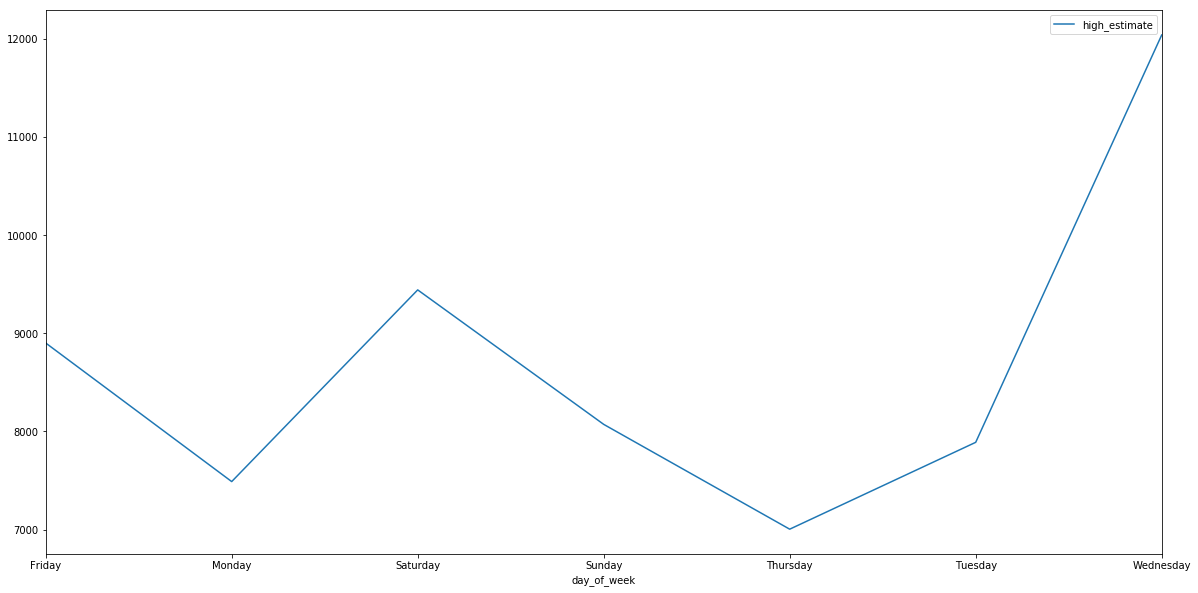

In [373]:
import numpy as np #high estimate trend based on week day
uber_by_day = uberPOOL[["day_of_week","high_estimate"]].groupby("day_of_week").aggregate(np.sum)
uber_by_day.plot();

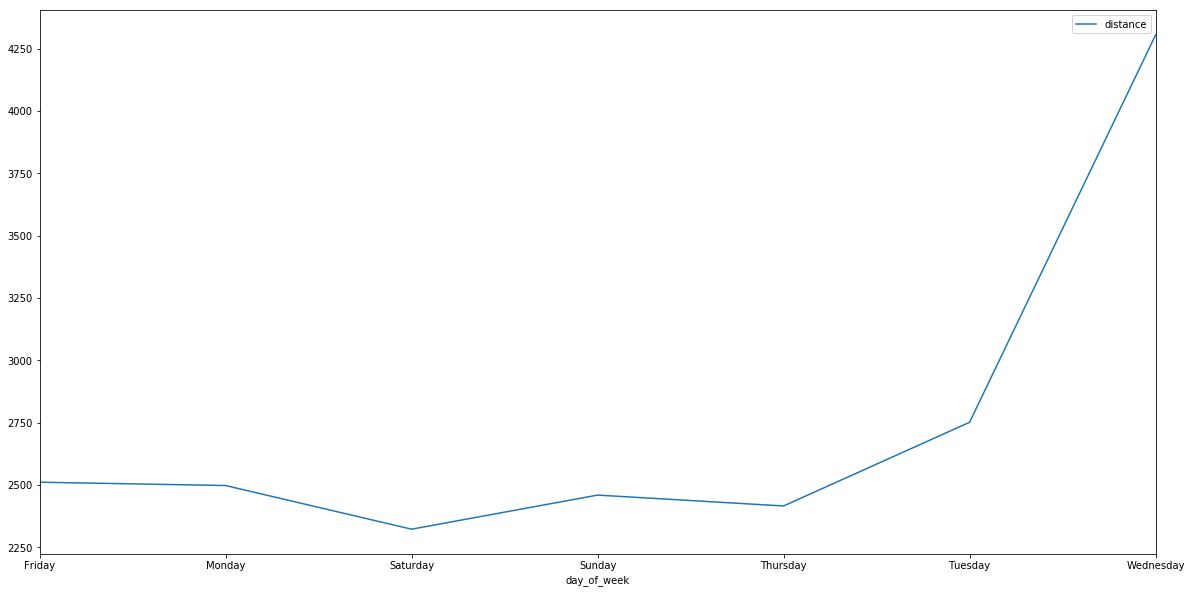

In [374]:
import numpy as np #distance trend based on weekday
uber_by_day = uberPOOL[["day_of_week","distance"]].groupby("day_of_week").aggregate(np.sum) # to find the day on which distance travelled is the most
uber_by_day.plot();

In [375]:
# Dropping columns of least significance for further analysis
uber.drop(['currency_code', 'estimate', 'localized_display_name', 'product_id', 'time', 'date', 'start_latitude', 'start_longitude'  ], axis =1, inplace = True) # Dropping cells as data is insignificant

In [376]:
uber.dtypes # data types check

date_time        datetime64[ns]
display_name             object
distance                float64
duration                  int64
end_latitude            float64
end_longitude           float64
high_estimate           float64
low_estimate            float64
day_of_week              object
Weather                  object
dtype: object

In [377]:
#import numpy as np
#import pandas as pd
#import holoviews as hv

#%matplotlib inline

#hv.extension('bokeh', 'matplotlib', width="100")
#%opts Curve [width=600 height=250 tools=['hover'] ] {+framewise} VLine (color="black")
#%opts Bars  [width=800 height=400 tools=['hover'] group_index=1 legend_position='top_left' xrotation=90]
#hv.extension('bokeh')

In [378]:
uber.count() # to check if null values are present

date_time        43896
display_name     43896
distance         43896
duration         43896
end_latitude     43896
end_longitude    43896
high_estimate    43896
low_estimate     43896
day_of_week      43896
Weather          43896
dtype: int64

In [379]:
print(min(uber.index)) # checkin table indexes
print(max(uber.index))

0
51210


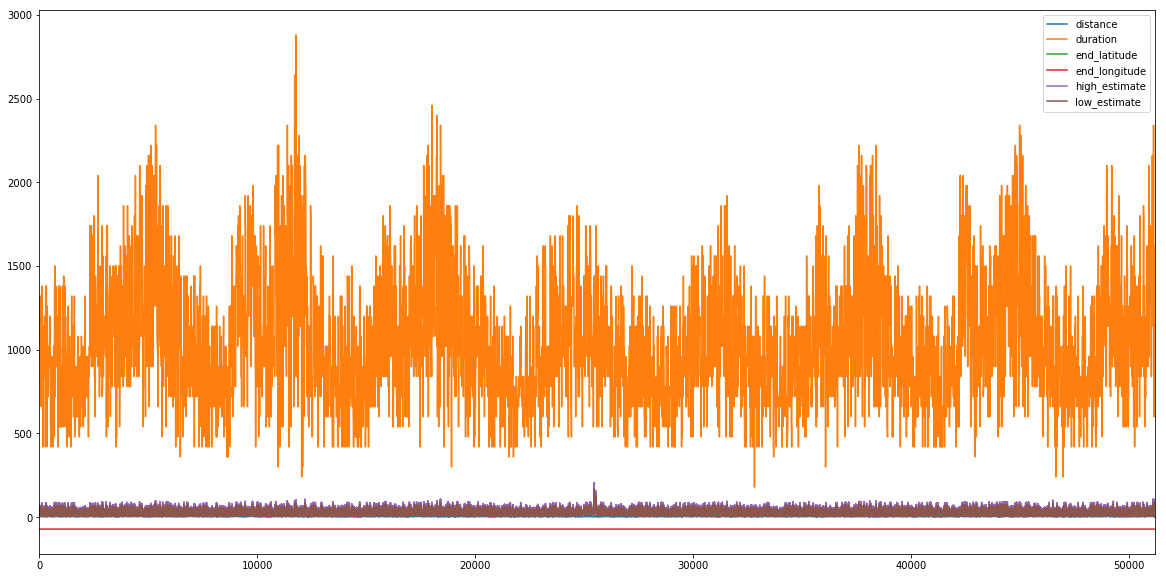

In [380]:
uber.plot()

In [381]:
days = {'Monday':0 ,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4, 'Saturday':5, 'Sunday':6}

uber['day_of_week'] = uber['day_of_week'].apply(lambda x: days[x])
#Assigning weights to days of the weeek

In [382]:
uber.head() # display dataframe

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,Rainy
1,2017-12-05 22:47:56,uberX,8.24,1080,42.314857,-71.056782,23.0,18.0,1,Rainy
2,2017-12-05 22:47:56,uberSUV,8.24,1080,42.314857,-71.056782,63.0,50.0,1,Rainy
3,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,Rainy
4,2017-12-05 22:47:56,UberBLACK,8.24,1080,42.314857,-71.056782,51.0,41.0,1,Rainy


In [383]:
#days = {'uberWAV':1 ,'uberXL':2,'uberPOOL':3,'uberX':4,'UberBLACK':5, 'uberSUV':6}

#uber['display_name'] = uber['display_name'].apply(lambda x: days[x])

In [384]:
climate = {'Snowy':1 ,'Rainy':2,'Sunny':3,'Cloudy':4} # Number based on ascending order of the number of rides in a particular weather

uber['Weather'] = uber['Weather'].apply(lambda x: climate[x])

In [385]:
uber.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,2
1,2017-12-05 22:47:56,uberX,8.24,1080,42.314857,-71.056782,23.0,18.0,1,2
2,2017-12-05 22:47:56,uberSUV,8.24,1080,42.314857,-71.056782,63.0,50.0,1,2
3,2017-12-05 22:47:56,uberXL,8.24,1080,42.314857,-71.056782,35.0,28.0,1,2
4,2017-12-05 22:47:56,UberBLACK,8.24,1080,42.314857,-71.056782,51.0,41.0,1,2


In [386]:
uber.dtypes

date_time        datetime64[ns]
display_name             object
distance                float64
duration                  int64
end_latitude            float64
end_longitude           float64
high_estimate           float64
low_estimate            float64
day_of_week               int64
Weather                   int64
dtype: object

In [387]:
#here we will separate the 6 different types of uber services into their own dataframes
uberPOOL = uber[uber.display_name == 'uberPOOL']
uberPOOL.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,2
7,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,2
14,2017-12-05 22:48:51,uberPOOL,6.18,1140,42.272678,-71.093765,10.0,6.0,1,2
21,2017-12-05 22:48:51,uberPOOL,6.18,1140,42.272678,-71.093765,10.0,6.0,1,2
28,2017-12-05 22:51:50,uberPOOL,8.53,1320,42.247948,-71.173050,15.0,10.0,1,2


In [388]:
#remove duplicated datetimeindex
uberPOOL = uberPOOL[~uberPOOL.date_time.duplicated(keep = 'first')]
uberPOOL.head()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,2017-12-05 22:47:56,uberPOOL,8.24,1080,42.314857,-71.056782,12.0,8.0,1,2
14,2017-12-05 22:48:51,uberPOOL,6.18,1140,42.272678,-71.093765,10.0,6.0,1,2
28,2017-12-05 22:51:50,uberPOOL,8.53,1320,42.247948,-71.173050,15.0,10.0,1,2
42,2017-12-05 22:54:57,uberPOOL,3.24,840,42.338443,-71.074548,8.0,5.0,1,2
56,2017-12-05 22:57:49,uberPOOL,4.14,720,42.360958,-71.065895,11.0,7.0,1,2


In [389]:
# Checking if duplicates are removed
uberPOOL.tail()

,date_time,display_name,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
51142,2017-12-13 15:27:19,uberPOOL,1.94,600,42.346358,-71.097615,11.0,7.0,2,3
51156,2017-12-13 15:30:19,uberPOOL,4.57,1620,42.358536,-71.060788,18.0,13.0,2,3
51170,2017-12-13 15:33:24,uberPOOL,1.94,660,42.346358,-71.097615,12.0,8.0,2,3
51184,2017-12-13 15:36:21,uberPOOL,6.09,1440,42.350274,-71.051305,17.0,13.0,2,3
51198,2017-12-13 15:39:19,uberPOOL,3.20,900,42.322207,-71.170310,19.0,14.0,2,3


In [390]:
#Counting total records
uberPOOL.count()

date_time        3658
display_name     3658
distance         3658
duration         3658
end_latitude     3658
end_longitude    3658
high_estimate    3658
low_estimate     3658
day_of_week      3658
Weather          3658
dtype: int64

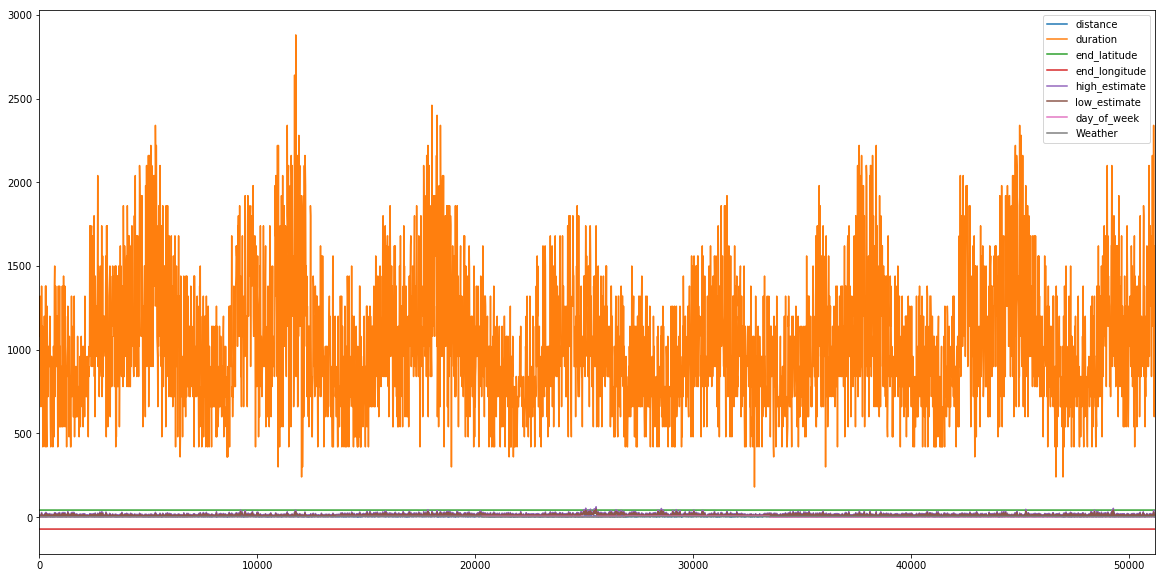

In [391]:
uberPOOL.plot() # plotting dataframe

In [392]:
#hv.Curve(uber_by_weather)

In [393]:
uberPOOL['high_estimate'].mean() # Calculate mean of high range

16.630945872061236

In [394]:
uberPOOL['high_estimate'].var() # Calculate variance

41.83751078131857

In [395]:
uberPOOL['high_estimate'].std() # Calculate Standard deviation

6.46819223441284

In [396]:
uberPOOL.drop(['display_name', 'date_time'], axis =1, inplace = True) # Dropping cells as data is insignificant

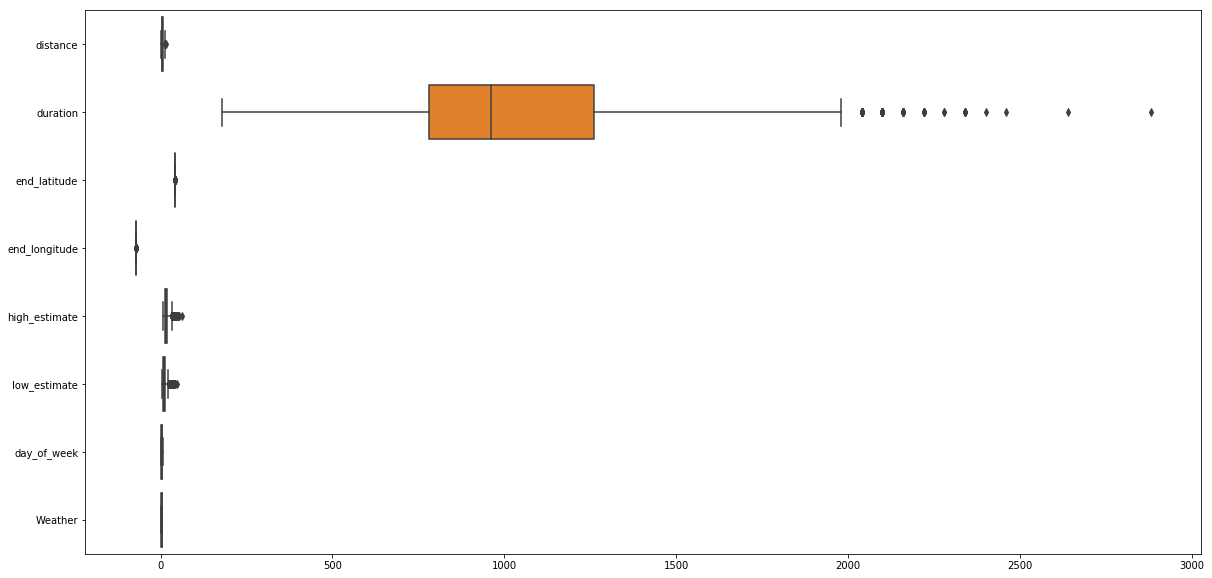

In [397]:
sns.boxplot(data=uberPOOL, orient="h") # to check for outliers

In [398]:
uberPOOL['high_estimate'] = uberPOOL['high_estimate'].apply(lambda x: "HH" if x>= uberPOOL['high_estimate'].mean() else "HL") #Converting high estimate as HH for prices greater than mean and HL for prices less than mean for analysis

In [399]:
uberPOOL.head() # displaying data

,distance,duration,end_latitude,end_longitude,high_estimate,low_estimate,day_of_week,Weather
0,8.24,1080,42.314857,-71.056782,HL,8.0,1,2
14,6.18,1140,42.272678,-71.093765,HL,6.0,1,2
28,8.53,1320,42.247948,-71.173050,HL,10.0,1,2
42,3.24,840,42.338443,-71.074548,HL,5.0,1,2
56,4.14,720,42.360958,-71.065895,HL,7.0,1,2


In [400]:
uberPOOL.groupby('high_estimate').count() # Counting the total number of records

,distance,duration,end_latitude,end_longitude,low_estimate,day_of_week,Weather
high_estimate,,,,,,,
HH,1497,1497,1497,1497,1497,1497,1497
HL,2161,2161,2161,2161,2161,2161,2161


In [401]:
uberPOOL.describe() # Describing columns

,distance,duration,end_latitude,end_longitude,low_estimate,day_of_week,Weather
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,5.265282,1039.043193,42.339442,-71.076939,11.885730,2.895845,2.995353
std,2.761660,391.295588,0.034898,0.037666,5.299203,1.930238,1.021363
min,1.290000,180.000000,42.247948,-71.173050,4.000000,0.000000,1.000000
25%,3.142500,780.000000,42.322207,-71.093765,8.000000,1.000000,2.000000
50%,4.695000,960.000000,42.348773,-71.074474,11.000000,3.000000,3.000000
75%,6.860000,1260.000000,42.360958,-71.057072,14.000000,5.000000,4.000000
max,14.530000,2880.000000,42.423240,-70.986913,49.000000,6.000000,4.000000


In [402]:
def scaled_df(df):
    scaled = pd.DataFrame()
    for item in df:
        if item in df.select_dtypes(include=[np.float]):
            scaled[item] = ((df[item] - df[item].min()) / 
            (df[item].max() - df[item].min()))
        else: 
            scaled[item] = df[item]
    return scaled
uberPOOL_scaled = scaled_df(uberPOOL)
# Scaling to remove outliers

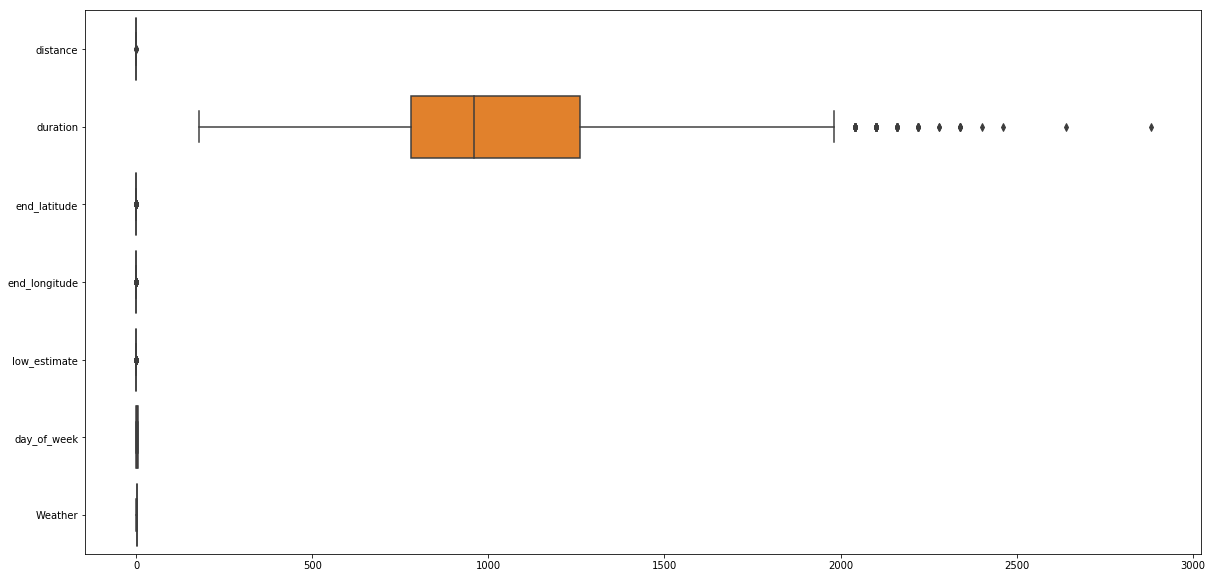

In [403]:
sns.boxplot(data=uberPOOL_scaled, orient="h")

In [404]:
uberPOOL_scaled.dtypes

distance         float64
duration           int64
end_latitude     float64
end_longitude    float64
high_estimate     object
low_estimate     float64
day_of_week        int64
Weather            int64
dtype: object

In [405]:
predictor_names = ['distance', 'duration', 'low_estimate', 'Weather', 'day_of_week', 'end_latitude', 'end_longitude']
# Defining factors affecting the ride

In [406]:
uberPOOL_scaled.dtypes

distance         float64
duration           int64
end_latitude     float64
end_longitude    float64
high_estimate     object
low_estimate     float64
day_of_week        int64
Weather            int64
dtype: object

In [407]:
# Defining the input and output varibles
X = uberPOOL_scaled[predictor_names]

#setting target
y = uberPOOL_scaled['high_estimate']

In [408]:

#dividing data to have a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .4, random_state=0)

In [409]:
from sklearn import svm # importing library for support vector machines

In [410]:
#setting rbfKernel svm classifier

rbfKernel = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)

print("KfoldCrossVal mean score using SVM is %s" %cross_val_score(rbfKernel,X,y,cv=10).mean())
#SVM metrics
sm = rbfKernel.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print("Accuracy score using SVM is %s" %metrics.accuracy_score(y_test, y_pred))

KfoldCrossVal mean score using SVM is 0.709192559772
Accuracy score using SVM is 0.801912568306


In [411]:
from sklearn.metrics import confusion_matrix # Analysis on the model

In [412]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(433, 172, 118, 741)

In [413]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [414]:
misclassificationRate = False_Positive + False_Negative/ total #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)


misclassificationRate: 172.080601093
precision: 0.81161007667
truePositiveRate :  0.86263096624
falsePositiveRate :  0.284297520661
Specificity :  0.715702479339
Prevalence :  0.506147540984


In [415]:
from sklearn.metrics import classification_report

In [416]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

         HH       0.79      0.72      0.75       605
         HL       0.81      0.86      0.84       859

avg / total       0.80      0.80      0.80      1464



In [417]:
knn_k = []
for i in range(0,33):  # try up to k=33
    if (i % 2 != 0): # Use only odd k 
        knn_k.append(i)

cross_vals = []
for k in knn_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,
                             X_train, 
                             y_train, 
                             cv = 10, 
                             scoring='accuracy')
    cross_vals.append(scores.mean())

MSE = [1 - x for x in cross_vals]
optimal_k = knn_k[MSE.index(min(MSE))]
print("Optimal K is {0}".format(optimal_k))

Optimal K is 1


In [418]:

# setting kNN classifier
knn = KNeighborsClassifier(n_neighbors=13)

# kNN cross validation

#print("KfoldCrossVal mean score using kNN is %s" %cross_val_score(knn,X,y,cv=10).mean())

# kNN metrics
kNNm = knn.fit(X_train, y_train)

y_pred = kNNm.predict(X_test)
print("Accuracy score using kNN is %s" %metrics.accuracy_score(y_test, y_pred))

Accuracy score using kNN is 0.803961748634


In [419]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(428, 177, 110, 749)

In [420]:
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

         HH       0.80      0.71      0.75       605
         HL       0.81      0.87      0.84       859

avg / total       0.80      0.80      0.80      1464



In [421]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [422]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 177.075136612
precision: 0.808855291577
truePositiveRate :  0.871944121071
falsePositiveRate :  0.292561983471
Specificity :  0.707438016529
Prevalence :  0.511612021858


In [423]:

from sklearn.naive_bayes import MultinomialNB, GaussianNB


In [424]:
# testing accuracy of Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class))

0.739754098361


In [425]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred_class).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(327, 278, 103, 756)

In [426]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [427]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 278.070355191
precision: 0.731141199226
truePositiveRate :  0.880093131548
falsePositiveRate :  0.459504132231
Specificity :  0.540495867769
Prevalence :  0.516393442623


In [428]:
report = classification_report(y_test, y_pred_class)
print(report)

             precision    recall  f1-score   support

         HH       0.76      0.54      0.63       605
         HL       0.73      0.88      0.80       859

avg / total       0.74      0.74      0.73      1464



In [429]:
# testing accuracy of Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class_gnb = gnb.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred_class_gnb))

0.899590163934


In [430]:
True_Negative, False_Positive, False_Negative, True_Positive=confusion_matrix(y_test, y_pred_class_gnb).ravel()
(True_Negative, False_Positive, False_Negative, True_Positive)

(516, 89, 58, 801)

In [431]:
total = True_Negative + False_Positive + False_Negative + True_Positive
total

1464

In [432]:
misclassificationRate = False_Positive + False_Negative/ total  #Analysis of results
print("misclassificationRate:", misclassificationRate)
precision = True_Positive/( False_Positive + True_Positive)
print("precision:", precision)
truePositiveRate = True_Positive / (True_Positive+False_Negative)
print("truePositiveRate : " , truePositiveRate)
falsePositiveRate = False_Positive / (True_Negative+False_Positive)
print("falsePositiveRate : ", falsePositiveRate)
Specificity = True_Negative / (True_Negative+False_Positive)
print("Specificity : ", Specificity)
Prevalence = True_Positive / total
print("Prevalence : ", Prevalence)

misclassificationRate: 89.0396174863
precision: 0.9
truePositiveRate :  0.932479627474
falsePositiveRate :  0.147107438017
Specificity :  0.852892561983
Prevalence :  0.547131147541


In [433]:
report = classification_report(y_test, y_pred_class_gnb)
print(report)

             precision    recall  f1-score   support

         HH       0.90      0.85      0.88       605
         HL       0.90      0.93      0.92       859

avg / total       0.90      0.90      0.90      1464

